# FAQs for Regression, MAP and MLE

* So far we have focused on regression.  We began with the polynomial regression example where we have training data $\mathbf{X}$ and associated training labels $\mathbf{t}$ and we use these to estimate weights, $\mathbf{w}$ to fit a polynomial curve through the data: 
\begin{equation}
y(x, \mathbf{w}) = \sum_{j=0}^M w_j x^j
\end{equation}

* We derived how to estimate the weights using both maximum likelihood estimation (MLE) and maximum a-posteriori estimation (MAP). 

* Then, we said that we can generalize this further using basis functions (instead of only raising x to the jth power): 
\begin{equation}
y(x, \mathbf{w}) = \sum_{j=0}^M w_j \phi_j(x)
\end{equation}
where $\phi_j(\cdot)$ is any basis function you choose to use on the data. 


* *Why is regression useful?*  
    * Regression is a common type of machine learning problem where we want to map inputs to a value (instead of a class label).  For example, the example we used in our first class was mapping silhouettes of individuals to their age. So regression is an important technique whenever you want to map from a data set to another value of interest. *Can you think of other examples of regression problems?*
    
    
* *Why would I want to use other basis functions?*
    * So, we began with the polynomial curve fitting example just so we can have a concrete example to work through but polynomial curve fitting is not the best approach for every problem.  You can think of the basis functions as methods to extract useful features from your data. For example, if it is more useful to compute distances between data points (instead of raising each data point to various powers), then you should do that instead!  
    
    
* *Why did we go through all the math derivations? You could've just provided the MLE and MAP solution to us since that is all we need in practice to code this up.* 
    * In practice, you may have unique requirements for a particular problem and will need to decide upon and set up a different data likelihood and prior for a problem.  For example, we assumed Gaussian noise for our regression example with a Gaussian zero-mean prior on the weights.  You may have an application in which you know the noise is Gamma distributed and have other requirements for the weights that you want to incorporate into the prior.  Knowing the process used to derive the estimate for weights in this case is a helpful guide for deriving your solution.  (Also, on a practical note for the course, stepping through the math served as a quick review of various linear algebra, calculus and statistics topics that will be useful throughout the course.) 
    
    
* *What is overfitting and why is it bad?* 
    * The goal of a supervised machine learning algorithm is to be able to learn a mapping from inputs to desired outputs from training data.  When you overfit, you memorize your training data such that you can recreate the samples perfectly. This often comes about when you have a model that is more complex than your underlying true model and/or you do not have the data to support such a complex model.  However, you do this at the cost of generalization.  When you overfit, you do very well on training data but poorly on test (or unseen) data.  So, to have useful trained machine learning model, you need to avoid overfitting.  You can avoid overfitting through a number of ways.  The methods we discussed in class are using *enough* data and regularization.  Overfitting is related to the "bias-variance trade-off" (discussed in section 3.2 of the reading).  There is a trade-off between bias and variance. Complex models have low bias and high variance (which is another way of saying, they fit the training data very well but may oscillate widely between training data points) where as rigid (not-complex-enough) models have high bias and low variance (they do not oscillate widely but may not fit the training data very well either).  
    
    
* *What is the goal of MLE and MAP?*
    * MLE and MAP are general approaches for estimating parameter values.  For example, you may have data from some unknown distribution that you would like to model as best you can with a Gaussian distribution.  You can use MLE or MAP to estimate the Gaussian parameters to fit the data and determine your estimate at what the true (but unknown) distribution is.  
    
    
* *Why would you use MAP over MLE (or vice versa)?* 
    * As we saw in class, MAP is a method to add in other terms to trade off against the data likelihood during optimization. It is a mechanism to incorporate our "prior belief" about the parameters.  In our example in class, we used the MAP solution for the weights in regression to help prevent overfitting by imposing the assumptions that the weights should be small in magnitude.  When you have enough data, the MAP and the MLE solution converge to the same solution.  The amount of data you need for this to occur varies based on how strongly you impose the prior (which is done using the variance of the prior distribution).  

# Probabilistic Generative Models

* So far we have focused on regression.  We will begin to discuss classification. 
* Suppose we have training data from two classes, $C_1$ and $C_2$, and we would like to train a classifier to assign a label to incoming test points whether they belong to class 1 or 2.  
* There are *many* classifiers in the machine learning literature.  We will cover a few in this class.  Today we will focus on probabilistic generative approaches for classification. 
* A *generative* approach for classification is one in which we estimate the parameters for distributions that generate the data for each class.  Then, when we have a test point, we can compute the posterior probability of that point belonging to each class and assign the point to the class with the highest posterior probability.  

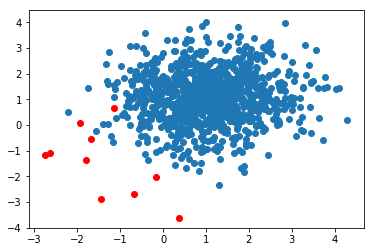

In [8]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
%matplotlib inline  

mean1 = [-1.5, -1]
mean2 = [1, 1]
cov1 = [[1,0], [0,1]]
cov2 = [[1,0],[0,1]]
N1 = 10
N2 = 1000

def generateData(mean1, mean2, cov1, cov2, N1=100, N2=100):
    # We are generating data from two Gaussians to represent two classes. 
    # In practice, we would not do this - we would just have data from the problem we are trying to solve. 
    class1X = np.random.multivariate_normal(mean1, cov1, N1)
    class2X = np.random.multivariate_normal(mean2, cov2, N2)
    
    fig = plt.figure()
    ax = fig.add_subplot(*[1,1,1])
    ax.scatter(class1X[:,0], class1X[:,1], c='r') 
    ax.scatter(class2X[:,0], class2X[:,1]) 
    plt.show()
    return class1X, class2X
    
class1X, class2X = generateData(mean1, mean2,cov1,cov2, N1,N2)

In the data we generated above, we have a "red" class and a "blue" class.  When we are given a test sample, we will want to assign the label of either red or blue.  

We can compute the posterior probability for class $C_1$ as follows:

\begin{eqnarray}
p(C_1 | x) &=& \frac{p(x|C_1)p(C_1)}{p(x)}\\
           &=& \frac{p(x|C_1)p(C_1)}{p(x|C_1)p(C_1) + p(x|C_2)p(C_2)}\\
\end{eqnarray}

We can similarly compute the posterior probability for class $C_2$: 

\begin{eqnarray}
p(C_2 | x) &=& \frac{p(x|C_2)p(C_2)}{p(x|C_1)p(C_1) + p(x|C_2)p(C_2)}\\
\end{eqnarray}

Note that $p(C_1|x) + p(C_2|x) = 1$. 

So, to train the classifier, what we need is to determine the parametric forms and estimate the parameters for $p(x|C_1)$, $p(x|C_2)$, $p(C_1)$ and $p(C_2)$. 

For example, we can assume that the data from both $C_1$ and $C_2$ are distributed according to Gaussian distributions.  In this case,
\begin{eqnarray}
p(\mathbf{x}|C_k) = \frac{1}{(2\pi)^{1/2}}\frac{1}{|\Sigma|^{1/2}}\exp\left\{ - \frac{1}{2} (\mathbf{x}-\mu_k)^T\Sigma_k^{-1}(\mathbf{x}-\mu_k)\right\}
\end{eqnarray}

Given the assumption of the Gaussian form, how would you estimate the parameter for $p(x|C_1)$ and $p(x|C_2)$?  *You can use maximum likelihood estimate for the mean and covariance!* 

The MLE estimate for the mean of class $C_k$ is: 
\begin{eqnarray}
\mu_{k,MLE} = \frac{1}{N_k} \sum_{n \in C_k} \mathbf{x}_n
\end{eqnarray}
where $N_k$ is the number of training data points that belong to class $C_k$

The MLE estimate for the covariance of class $C_k$ is: 
\begin{eqnarray}
\Sigma_{k,MLE} = \frac{1}{N_k} \sum_{n \in C_k} (\mathbf{x}_n - \mu_{k,MLE})(\mathbf{x}_n - \mu_{k,MLE})^T
\end{eqnarray}

We can determine the values for $p(C_1)$ and $p(C_2)$ from the number of data points in each class:
\begin{eqnarray}
p(C_k) = \frac{N_k}{N}
\end{eqnarray}
where $N$ is the total number of data points. 



In [9]:
#Estimate the mean and covariance for each class from the training data
mu1 = np.mean(class1X, axis=0)
print(mu1)

cov1 = np.cov(class1X.T)
print(cov1)

mu2 = np.mean(class2X, axis=0)
print(mu2)

cov2 = np.cov(class2X.T)
print(cov2)

# Estimate the prior for each class
pC1 = class1X.shape[0]/(class1X.shape[0] + class2X.shape[0])
print(pC1)

pC2 = class2X.shape[0]/(class1X.shape[0] + class2X.shape[0])
print(pC2)

[-1.3878514  -1.46887309]
[[ 1.02284869 -0.75367567]
 [-0.75367567  1.82753065]]
[1.02244614 1.05774345]
[[1.03062641 0.06028441]
 [0.06028441 1.00810666]]
0.009900990099009901
0.9900990099009901


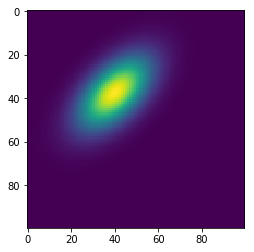

In [10]:
#We now have all parameters needed and can compute values for test samples
from scipy.stats import multivariate_normal

x = np.linspace(-5, 4, 100)
y = np.linspace(-6, 6, 100)
xm,ym = np.meshgrid(x, y)
X = np.dstack([xm,ym])

#look at the pdf for class 1
y1 = multivariate_normal.pdf(X, mean=mu1, cov=cov1)
plt.imshow(y1)


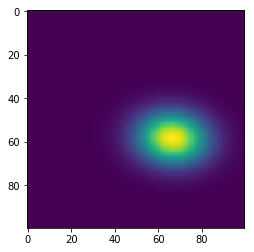

In [11]:
#look at the pdf for class 2
y2 = multivariate_normal.pdf(X, mean=mu2, cov=cov2);
plt.imshow(y2)

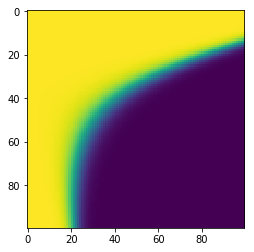

In [12]:
#Look at the posterior for class 1
pos1 = (y1*pC1)/(y1*pC1 + y2*pC2 );
plt.imshow(pos1)

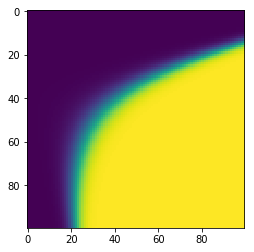

In [13]:
#Look at the posterior for class 2
pos2 = (y2*pC2)/(y1*pC1 + y2*pC2 );
plt.imshow(pos2)

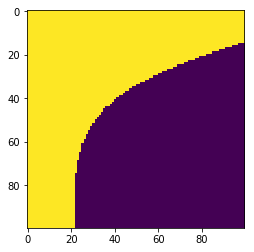

In [14]:
#Look at the decision boundary
plt.imshow(pos1>pos2)

*How did we come up with using the MLE solution for the mean and variance? How did we determine how to compute $p(C_1)$ and $p(C_2)$?

* We can define a likelihood for this problem and maximize it!

\begin{eqnarray}
p(\mathbf{t}, \mathbf{X}|\pi, \mu_1, \mu_2, \Sigma_1, \Sigma_2) = \prod_{n=1}^N \left[\pi N(x_n|\mu_1, \Sigma_1)\right]^{t_n}\left[(1-\pi)N(x_n|\mu_2, \Sigma_2) \right]^{1-t_n}
\end{eqnarray}

* *How would we maximize this?* As usual, we would use our "trick" and take the log of the likelihood function.  Then, we would take the derivative with respect to each parameter we are interested in, set the derivative to zero, and solve for the parameter of interest. 